# 1. **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. **Load Data**

In [2]:
 df=pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")

In [3]:
df.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


# 3. **Preprocessing On Data**

In [4]:
df.shape

(21613, 21)

We Should convert column date into Date

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [10]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
df['date'].dtype

dtype('O')

O means that type of this column is Object and we should convert it into Date  

In [12]:
df['datetime'] = pd.to_datetime(df['date'])

In [13]:
df['datetime'].dtype

dtype('<M8[ns]')

In [14]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

In [15]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21613, dtype: int64

In [16]:
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: month, Length: 21613, dtype: int64

In [17]:
df.dtypes

id                        int64
date                     object
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
datetime         datetime64[ns]
year                      int64
month                     int64
dtype: object

# 4.**Exploratory data analysis**

<Axes: >

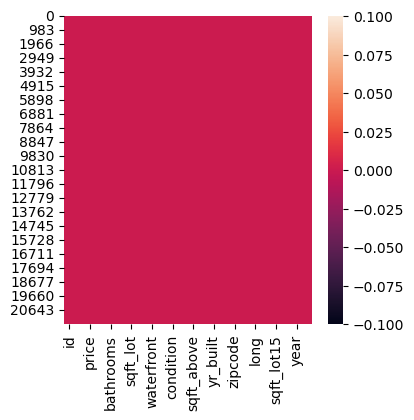

In [18]:
import matplotlib.pyplot  as plt 
import seaborn as sns 
plt.figure(figsize=[4, 4])
sns.heatmap( df.isna())

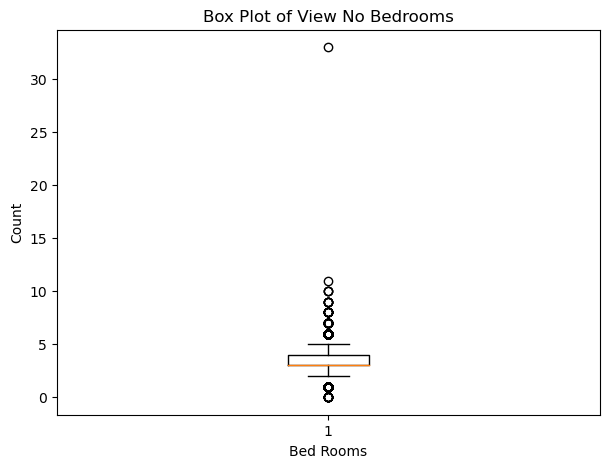

In [19]:
# Create a box plot
plt.figure(figsize=[7,5])
plt.boxplot(df['bedrooms'])

# Add labels and title
plt.xlabel('Bed Rooms')
plt.ylabel('Count')
plt.title('Box Plot of View No Bedrooms')

# Show the plot
plt.show()

In [20]:
houses_per_year = df.groupby('yr_built')['id'].count()

<Axes: xlabel='price', ylabel='sqft_living'>

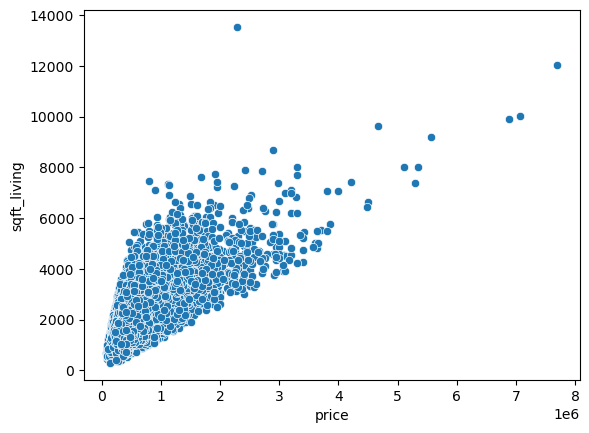

In [21]:
plt.figure()
sns.scatterplot(x='price',y='sqft_living',data=df)

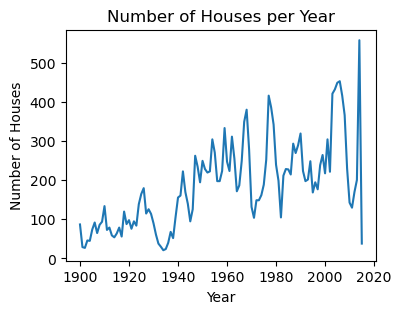

In [22]:
plt.figure(figsize=[4, 3])
plt.plot(houses_per_year.index,houses_per_year.values)
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Houses')
plt.title('Number of Houses per Year')
plt.show()

# 5.Largest Number Of bedrooms in house 

In [23]:
print("largest number of bedrooms in dataset = ",max(df['bedrooms']))

largest number of bedrooms in dataset =  33


# 6.The Oldest and the Newest hose in Data  

In [24]:
print('The oldest House : ', df['yr_built'].min())
print('The New house    : ', df['yr_built'].max())

The oldest House :  1900
The New house    :  2015


# 7.Unique Years of Building House 

In [25]:
year_unique=df['yr_built'].unique()
year_unique

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

# 8.price correlation matrix

/tmp/ipykernel_20/2951835314.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


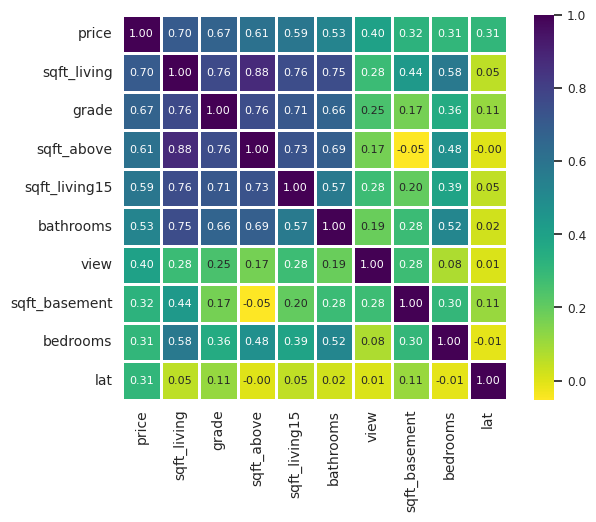

In [26]:
# price correlation matrix

corr = df.corr()
k = 10 #number of coulmns for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    sns.set(font_scale=0.8)
    ax = sns.heatmap(cm,cbar=True, square=True, annot=True,fmt='0.2f',linewidths=.8,
                     cmap="viridis_r", annot_kws={'size': 8}, yticklabels=cols.values,
                     xticklabels=cols.values)

In [27]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'datetime', 'year',
       'month'],
      dtype='object')

# 9.Drop unused Columns 

In [28]:
df.drop(columns=['id', 'date', 'datetime'], inplace=True)

In [29]:
df.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

# 10.Spliting Data To building Model

In [30]:
#X = df.drop(['price'],axis=1) #test data 

X = df.drop(['price'],axis=1) #test data 

y = df['price']

# 11. Trainig=80% , Testing=20%.

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [32]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
15166,4,4.00,3860,67953,2.0,0,2,4,12,3860,0,1927,0,98177,47.7469,-122.378,4410,128066,2015,1
13416,4,2.00,1920,7803,1.0,0,0,3,7,1080,840,1962,0,98155,47.7580,-122.325,1940,8147,2014,12
206,3,2.50,2440,4587,2.0,0,0,3,8,2440,0,2010,0,98052,47.7073,-122.114,2750,4587,2014,9
4286,3,2.75,1910,15508,1.0,0,0,3,8,1210,700,1984,0,98023,47.3128,-122.345,2450,7989,2015,3
18065,4,2.50,2130,9100,1.0,0,0,3,8,1290,840,1978,0,98030,47.3815,-122.169,1770,7700,2014,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,2,1.00,720,4222,1.0,0,0,4,5,720,0,1942,0,98056,47.4965,-122.186,860,4785,2014,5
18898,4,2.50,1820,9161,1.0,0,0,4,7,1220,600,1975,0,98058,47.4333,-122.168,1860,7650,2014,8
11798,4,3.25,3440,7661,2.0,0,0,3,11,3440,0,2006,0,98029,47.5429,-121.995,3580,6478,2014,6
6637,2,1.50,870,747,2.0,0,0,3,8,800,70,2004,0,98103,47.6967,-122.342,1710,1280,2015,1


In [33]:
print("Test Data = ",x_test.shape)
print("Train Data = ",x_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (4323, 20)
Train Data =  (17290, 20)
Target Train =  (17290,)
Target Test =  (4323,)


In [34]:
y_train

15166    1755000.0
13416     360000.0
206       677900.0
4286      300000.0
18065     220000.0
           ...    
1099      151000.0
18898     325000.0
11798     905000.0
6637      313000.0
2575      690000.0
Name: price, Length: 17290, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler 
# Standard Scaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(x_train)
#X_train = pd.DataFrame(X_train, columns=df.columns)

X_test = std_scale.transform(x_test)
#X_test = pd.DataFrame(X_test, columns=df.columns)

In [36]:
X_train

array([[ 0.68095813,  2.45689305,  1.95989432, ...,  4.25588727,
         1.43873465, -1.77890817],
       [ 0.68095813, -0.14628777, -0.16820792, ..., -0.16676007,
        -0.6950552 ,  1.73650657],
       [-0.39309461,  0.50450743,  0.40221123, ..., -0.2980539 ,
        -0.6950552 ,  0.77775709],
       ...,
       [ 0.68095813,  1.48070024,  1.49917115, ..., -0.22831327,
        -0.6950552 , -0.18099238],
       [-1.46714735, -0.79708298, -1.32001584, ..., -0.42001701,
         1.43873465, -1.77890817],
       [-0.39309461,  0.50450743,  0.819056  , ..., -0.28278546,
        -0.6950552 ,  1.41692341]])

In [37]:
X_test

array([[ 0.68095813,  0.17910983,  0.36930244, ..., -0.2800932 ,
         1.43873465, -0.8201587 ],
       [-0.39309461, -0.79708298,  0.10603206, ...,  0.04449022,
        -0.6950552 , -0.18099238],
       [-1.46714735, -1.44787818, -0.68377908, ..., -0.23192754,
        -0.6950552 ,  1.09734025],
       ...,
       [ 0.68095813,  0.50450743,  0.63257282, ..., -0.14083323,
        -0.6950552 ,  0.45817393],
       [-1.46714735, -1.44787818, -1.37486383, ..., -0.23672198,
        -0.6950552 , -0.18099238],
       [ 0.68095813,  0.82990504, -0.28887351, ..., -0.14721352,
        -0.6950552 ,  1.09734025]])

In [38]:
y_train

15166    1755000.0
13416     360000.0
206       677900.0
4286      300000.0
18065     220000.0
           ...    
1099      151000.0
18898     325000.0
11798     905000.0
6637      313000.0
2575      690000.0
Name: price, Length: 17290, dtype: float64

# 12. LinearRegression Algorithm

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [40]:
pred = LR.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
print('LineRegression r2_score :', r2_score(y_test, pred))

LineRegression r2_score : 0.7179810046930719


# 13.SGDRegressor

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
# Model
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

# Prediction
pred2 = sgd.predict(X_test)

In [43]:
from numpy.ma.core import floor
# Performance Measure
sgd_mse = mean_squared_error(y_test, pred2)
sgd_r2 = r2_score(y_test, pred2)

print("MSE =",sgd_mse)
print("R2 = ",floor(sgd_r2*100),"%") 

MSE = 39722852343.5292
R2 =  71.0 %


# 14.Tune model parameters to get high accuracy

In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import  GridSearchCV
# Define the hyperparameters to tune
params = {
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001,0.001,0.01,0.1]
   
}
# Use GridSearchCV to tune the hyperparameters
grid = GridSearchCV(sgd, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

# Use the best hyperparameters to train the model
sgd = SGDRegressor(**grid.best_params_)
sgd.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
sgd_r3 = r2_score(y_test, y_pred)
print(f"Mean squared error = {mse}")
print(f"R2 = {round(sgd_r3*100)} % ")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'alpha': 0.0001, 'learning_rate': 'invscaling', 'penalty': 'elasticnet'}
Mean squared error = 39616209195.22678
R2 = 72 % 


# 15.Saving Model And Predict house price 

In [45]:
import pickle
from numpy.ma.core import floor
# Model
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

# Prediction
pickle.dump(sgd,open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
# #  bedrooms =4	    bathrooms=4	                 sqft_living=3860	                 sqft_lot=67953	
# 	floors=2		   waterfront=0	                 view=2 	     	                 condition =4	
# 	grade=12 	   sqft_above=3860                sqft_basement=0                   yr_built=1927			yr_renovated=0	   zipcode= 98177 	                lat=-47.7469 	                  long= 122.378 	
# 	sqft_living15= 4410    sqft_lot15= 128066              year=2015	                   month=1

x=model.predict([[4	,2.00,	1920,	7803	,1.0,	0,	0,	3,	7,	1080,	840	,1962,	0,	98155,	47.7580	,-122.325	,1940	,8147	,2014	,12]])*-1
print("The predicted  House Price = ",x,"M")

The predicted  House Price =  [3.2506419e+09] M


In [46]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(X_train, y_train)

print(rfg_model.score(X_test, y_test)*100,"%")

87.92054874881013 %


# THANKS :)